# King County house prices prediction

In [1]:
import numpy as np
import pandas as pd
from dmba import AIC_score, stepwise_selection, forward_selection, backward_elimination
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
import seaborn as sns
import matplotlib.pyplot as plt
from pygam import LinearGAM, GAM, s, l, f

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df=df.dropna()

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

(0.0, 3000000.0)

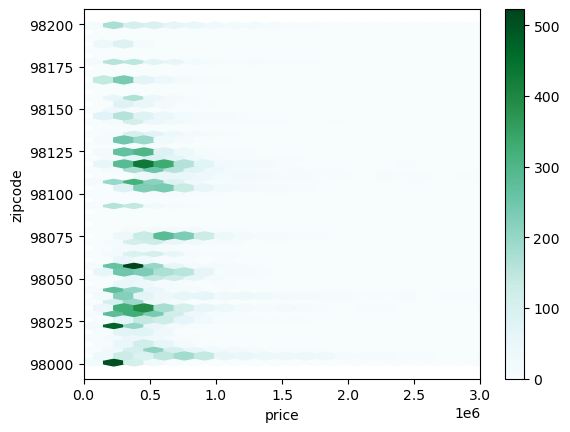

In [6]:
ax=df.plot.hexbin(x='price',y='zipcode',gridsize=50)
plt.xlim(0,3e6)

(0.0, 3000000.0)

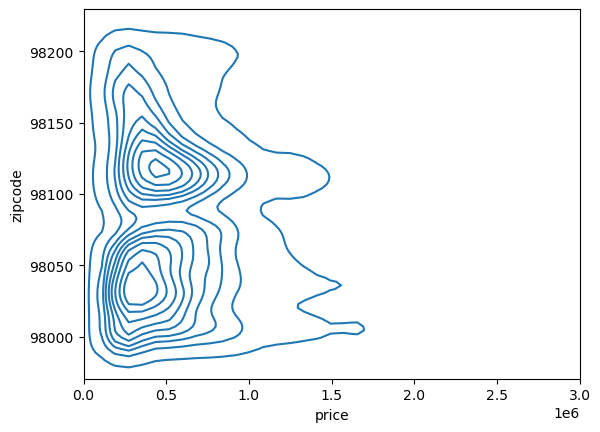

In [7]:
ax =sns.kdeplot(data=df,x='price',y='zipcode',gridsize=100)
plt.xlim(0,3e6)


In [8]:
dispose = ['id','date','zipcode']
df=df.drop(dispose,axis=1)

In [9]:
target=df.price
predictor=df.drop(['price'],axis=1)

In [10]:
predictor

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [11]:
X_train, X_test, y_train,y_test = train_test_split(predictor,target,test_size=0.2)

In [12]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
model.intercept_

-36840211.11105219

In [14]:
model.coef_

array([-3.45435841e+04,  4.25908038e+04,  1.07095012e+02,  2.02676355e-01,
        2.69865391e+03,  5.59131234e+05,  5.05851538e+04,  3.19965601e+04,
        9.74442179e+04,  7.27840464e+01,  3.43109650e+01, -2.55203069e+03,
        2.10755943e+01,  5.55044672e+05, -1.20625039e+05,  3.00042357e+01,
       -4.61692454e-01])

In [15]:
fitted = model.predict(X_test)
RMSE = np.sqrt(skm.mean_squared_error(fitted,y_test))
R2= skm.r2_score(fitted,y_test)
print(f'RMSE:{RMSE:.0f}')
print(f'R2:{R2:.4f}')

RMSE:201029
R2:0.5725


In [16]:
predictor.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [17]:
predictor=pd.get_dummies(predictor,drop_first=True)
predictor.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
model=sm.regression.linear_model.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              9797.
Date:                Mon, 01 Jan 2024   Prob (F-statistic):                        0.00
Time:                        11:17:12   Log-Likelihood:                     -2.3605e+05
No. Observations:               17290   AIC:                                  4.721e+05
Df Residuals:                   17274   BIC:                                  4.723e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.618e+04   2139.250    -16.914      0.000   -4.04e+04    -3.2e+04
bathrooms      4.625e+04   3708.949     12.469      0.000     3.9e+04    5.35e+04
sqft_living     106.9990      2.589     41.329      0.000     101.924     112.074
sqft_lot          0.1052      0.055      1.901      0.057      -0.003       0.214
floors          1.73e+04   4027.317      4.295      0.000    9405.356    2.52e+04
waterfront     5.636e+05   1.97e+04     28.624      0.000    5.25e+05    6.02e+05
view           5.323e+04   2443.560     21.782      0.000    4.84e+04     5.8e+04
condition      2.603e+04   2639.221      9.862      0.000    2.09e+04    3.12e+04
grade          1.076e+05   2414.666     44.559      0.000    1.03e+05    1.12e+05
sqft_above       61.6528      2.514     24.523      0.000      56.725      66.581
sqft_basement    45.3461      2.973     15.251      0.000      39.518      51.174
yr_built      -3319.5028     73.193    -45.353      0.000   -3462.968   -3176.038
yr_renovated     12.9464      4.204      3.080      0.002       4.706      21.187
lat            4.816e+05   1.14e+04     42.329      0.000    4.59e+05    5.04e+05
long           1.401e+05   4667.908     30.014      0.000    1.31e+05    1.49e+05
sqft_living15    15.3215      3.864      3.965      0.000       7.747      22.896
sqft_lot15       -0.5954      0.085     -6.990      0.000      -0.762      -0.428
==============================================================================
Omnibus:                    15129.865   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1639025.108
Skew:                           3.717   Prob(JB):                         0.00
Kurtosis:                      50.115   Cond. No.                     1.87e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.3e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model Selection + AIC

In [19]:
def train_model(variables):
    if(len(variables)==0):
        return None
    model = LinearRegression()
    model.fit(X_train[variables],y_train)
    return model

def score_model(model, variables):
    if len(variables)==0 :
        return AIC_score(y_train, [y_train.mean()]*len(y_train),model,df=1)
    return AIC_score(y_train,model.predict(X_train[variables]),model)


In [20]:
best_model, best_variables = stepwise_selection(X_train.columns, train_model,score_model,verbose=True)


Variables: bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15
Start: score=492203.13, constant
Step: score=480546.05, add sqft_living
Step: score=477843.02, add lat
Step: score=476024.67, add view
Step: score=474812.25, add grade
Step: score=473230.07, add yr_built
Step: score=472389.57, add waterfront
Step: score=472214.31, add bedrooms
Step: score=472041.92, add bathrooms
Step: score=471946.85, add condition
Step: score=471877.09, add sqft_above
Step: score=471812.54, add long
Step: score=471763.61, add sqft_living15
Step: score=471740.57, add yr_renovated
Step: score=471725.85, add sqft_lot15
Step: score=471714.27, add sqft_lot
Step: score=471714.27, unchanged None


In [21]:
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients: \n')
for name, coef in zip(best_variables, best_model.coef_):
    print(f'{name}:{coef}')

Intercept: -37050363.752
Coefficients: 

sqft_living:140.4091249496948
lat:555869.6244519618
view:50634.579425105774
grade:97584.33698809001
yr_built:-2540.832501835542
waterfront:559171.4491979255
bedrooms:-34581.455981418825
bathrooms:43223.274568109184
condition:31882.83398997492
sqft_above:39.921201342132676
long:-121861.34826157239
sqft_living15:29.690313732120206
yr_renovated:21.227187676262382
sqft_lot15:-0.4637144706304871
sqft_lot:0.20216209407991048


In [22]:
best_model1, best_variables1 = forward_selection(X_train.columns, train_model,score_model,verbose=True)

Variables: bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15
Start: score=492203.13, constant
Step: score=480546.05, add sqft_living
Step: score=477843.02, add lat
Step: score=476024.67, add view
Step: score=474812.25, add grade
Step: score=473230.07, add yr_built
Step: score=472389.57, add waterfront
Step: score=472214.31, add bedrooms
Step: score=472041.92, add bathrooms
Step: score=471946.85, add condition
Step: score=471877.09, add sqft_above
Step: score=471812.54, add long
Step: score=471763.61, add sqft_living15
Step: score=471740.57, add yr_renovated
Step: score=471725.85, add sqft_lot15
Step: score=471714.27, add sqft_lot
Step: score=471714.27, add None


In [23]:
best_model2, best_variables2 = backward_elimination(X_train.columns, train_model,score_model,verbose=True)

Variables: bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15
Start: score=471717.82
Step: score=471715.82, remove sqft_living
Step: score=471714.27, remove floors
Step: score=471714.27, remove None


In [24]:
Y_hat = best_model.predict(X_test[best_variables])
Y_hat1 = best_model1.predict(X_test[best_variables1])
Y_hat2 = best_model2.predict(X_test[best_variables2])


In [25]:
print('stepwise : {} \n forward: {} \n backward:{}'
      .format(skm.r2_score(y_test,Y_hat),skm.r2_score(y_test,Y_hat1),skm.r2_score(y_test,Y_hat2)))
#skm.r2_score(y_test,Y_hat1)
#skm.r2_score(y_test,Y_hat2)

stepwise : 0.6970912754715437 
 forward: 0.6970912754715437 
 backward:0.697091275471293


In [26]:
df = pd.read_csv("kc_house_data.csv")

In [27]:
zip=pd.DataFrame(df.zipcode.value_counts()).transpose()
M=zip.values
M

array([[602, 590, 583, 574, 553, 548, 545, 508, 499, 498, 494, 468, 455,
        446, 441, 432, 412, 410, 406, 405, 362, 359, 354, 351, 343, 335,
        330, 321, 317, 317, 310, 290, 288, 283, 283, 282, 280, 280, 274,
        273, 269, 269, 268, 266, 263, 262, 256, 255, 254, 234, 229, 221,
        199, 198, 195, 190, 186, 184, 168, 141, 136, 125, 124, 118, 109,
        105, 100,  81,  57,  50]], dtype=int64)

In [28]:
dispose = ['id','date']
df=df.drop(dispose,axis=1)
predictor = df.drop(['price'],axis=1)


In [29]:
X_train, X_test, y_train,y_test = train_test_split(predictor,target,test_size=0.2)

In [30]:
best_model2, best_variables2 = backward_elimination(X_train.columns, train_model,score_model,verbose=True)

Variables: bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15
Start: score=470972.11
Step: score=470970.11, remove sqft_living
Step: score=470970.11, remove None


In [31]:
Y_hat2 = best_model2.predict(X_test[best_variables2])

In [32]:
skm.r2_score(y_test,Y_hat2)

0.6845256013747483

In [33]:
model=sm.regression.linear_model.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              9837.
Date:                Mon, 01 Jan 2024   Prob (F-statistic):                        0.00
Time:                        11:17:19   Log-Likelihood:                     -2.3547e+05
No. Observations:               17290   AIC:                                  4.710e+05
Df Residuals:                   17273   BIC:                                  4.711e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.533e+04   2058.630    -17.164      0.000   -3.94e+04   -3.13e+04
bathrooms      4.077e+04   3613.224     11.285      0.000    3.37e+04    4.79e+04
sqft_living     112.3161      2.512     44.705      0.000     107.392     117.241
sqft_lot          0.1165      0.057      2.048      0.041       0.005       0.228
floors         6359.3629   3929.085      1.619      0.106   -1342.042    1.41e+04
waterfront     6.703e+05   1.92e+04     34.941      0.000    6.33e+05    7.08e+05
view           4.631e+04   2373.441     19.513      0.000    4.17e+04     5.1e+04
condition      2.561e+04   2559.840     10.003      0.000    2.06e+04    3.06e+04
grade          9.248e+04   2368.443     39.046      0.000    8.78e+04    9.71e+04
sqft_above       71.2804      2.478     28.764      0.000      66.423      76.138
sqft_basement    41.0357      2.896     14.168      0.000      35.358      46.713
yr_built      -2554.8111     75.385    -33.890      0.000   -2702.574   -2407.048
yr_renovated     21.1281      4.055      5.211      0.000      13.181      29.075
zipcode        -514.4846     19.647    -26.186      0.000    -552.995    -475.974
lat            6.096e+05   1.19e+04     51.379      0.000    5.86e+05    6.33e+05
long          -2.114e+05   1.44e+04    -14.714      0.000    -2.4e+05   -1.83e+05
sqft_living15    22.6072      3.759      6.014      0.000      15.239      29.976
sqft_lot15       -0.3450      0.081     -4.269      0.000      -0.503      -0.187
==============================================================================
Omnibus:                    14628.907   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1456653.606
Skew:                           3.538   Prob(JB):                         0.00
Kurtosis:                      47.406   Cond. No.                     1.89e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.91e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model optimization:
###       *Checking multicollinearity
###       *Searching for the confounding variables
###       *Imposing interactions between predictor variables in the regression model

In [34]:
df.corr()## Model Selection + AIC

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [35]:
df = pd.read_csv("kc_house_data.csv")

<AxesSubplot:>

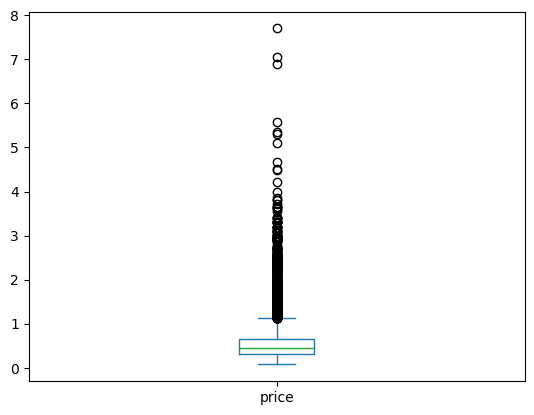

In [36]:
(df['price']/1_000_000).plot.box()

<AxesSubplot:xlabel='zipcode', ylabel='price'>

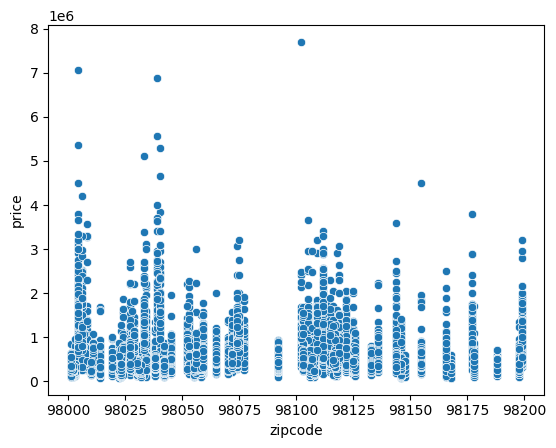

In [37]:
sns.scatterplot(data=df, x='zipcode',y='price')

In [38]:
def group(column):
    aux = pd.DataFrame(['A' for i in range(0,len(column.index))],index=column.index)
    for ind in range(0,len(column.index)-1):
        if column.values[ind]>=3500000:
            aux.values[ind] = 'A'
        elif (column.values[ind]<3500000) and (column.values[ind]>=2e6):
            aux.values[ind] = 'B'
        elif (column.values[ind]<2e6) and (column.values[ind]>=1e6):
            aux.values[ind] = 'C'
        else:
            aux.values[ind] = 'D'
    return aux


df2 = df.assign(zipgroup=group(df.price))

In [39]:
df2.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [40]:
df = pd.read_csv("kc_house_data.csv")
def group(column):
    aux = pd.DataFrame(['A' for i in range(0,len(column.index))],index=column.index)
    for ind in range(0,len(column.index)-1):
        if column.values[ind]>=3500000:
            aux.values[ind] = 'A'
        elif (column.values[ind]<3500000) and (column.values[ind]>=2e6):
            aux.values[ind] = 'B'
        elif (column.values[ind]<2e6) and (column.values[ind]>=1e6):
            aux.values[ind] = 'C'
        else:
            aux.values[ind] = 'D'
    return aux

df2 = df.assign(zipgroup=group(df.price))
dispose = ['id','date','sqft_living15','sqft_above']
df3=df2.drop(dispose,axis=1)
df3=pd.get_dummies(df3,drop_first=True)
predictor = df3.drop(['price'],axis=1)

X_train, X_test, y_train,y_test = train_test_split(predictor,target,test_size=0.2)

In [41]:
best_model2, best_variables2 = backward_elimination(X_train.columns, train_model,score_model,verbose=True)
Y_hat2 = best_model2.predict(X_test[best_variables2])
skm.r2_score(y_test,Y_hat2)

Variables: bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_lot15, zipgroup_B, zipgroup_C, zipgroup_D
Start: score=456644.14
Step: score=456644.14, remove None


0.8563170548917084

In [42]:
len(best_variables2)

19

In [43]:
model=sm.regression.linear_model.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          2.179e+04
Date:                Mon, 01 Jan 2024   Prob (F-statistic):                        0.00
Time:                        11:17:21   Log-Likelihood:                     -2.2831e+05
No. Observations:               17290   AIC:                                  4.567e+05
Df Residuals:                   17271   BIC:                                  4.568e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -1.133e+04   1450.563     -7.812      0.000   -1.42e+04   -8488.875
bathrooms      2.607e+04   2374.579     10.981      0.000    2.14e+04    3.07e+04
sqft_living      99.3126      2.526     39.317      0.000      94.362     104.264
sqft_lot          0.2435      0.037      6.551      0.000       0.171       0.316
floors         1.828e+04   2559.558      7.140      0.000    1.33e+04    2.33e+04
waterfront     1.937e+05    1.3e+04     14.856      0.000    1.68e+05    2.19e+05
view           2.498e+04   1570.253     15.908      0.000    2.19e+04    2.81e+04
condition      2.327e+04   1689.002     13.777      0.000       2e+04    2.66e+04
grade          7.287e+04   1531.059     47.594      0.000    6.99e+04    7.59e+04
sqft_basement   -16.2012      3.116     -5.199      0.000     -22.309     -10.093
yr_built      -1656.8812     50.237    -32.981      0.000   -1755.352   -1558.411
yr_renovated     14.0501      2.671      5.261      0.000       8.815      19.285
zipcode        -276.1633     13.045    -21.170      0.000    -301.733    -250.593
lat            5.496e+05   7842.744     70.077      0.000    5.34e+05    5.65e+05
long          -5.653e+04   9507.025     -5.946      0.000   -7.52e+04   -3.79e+04
sqft_lot15       -0.2138      0.054     -3.928      0.000      -0.320      -0.107
zipgroup_B    -1.691e+06   3.23e+04    -52.362      0.000   -1.75e+06   -1.63e+06
zipgroup_C    -2.621e+06   3.13e+04    -83.759      0.000   -2.68e+06   -2.56e+06
zipgroup_D    -3.092e+06   3.16e+04    -97.919      0.000   -3.15e+06   -3.03e+06
==============================================================================
Omnibus:                     5507.936   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           716165.313
Skew:                           0.444   Prob(JB):                         0.00
Kurtosis:                      34.517   Cond. No.                     5.44e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression diagnostics

In [44]:
influence = OLSInfluence(results)
sresiduals = influence.resid_studentized_internal
#sresiduals.idxmin(), sresiduals.min()
outlier = df3.loc[sresiduals.idxmin(),:]
print('outlier price = {}'.format(outlier['price']))
print(outlier[best_variables2])

outlier price = 325000.0
bedrooms             2.0000
bathrooms            0.7500
sqft_living       1020.0000
sqft_lot          1076.0000
floors               2.0000
waterfront           0.0000
view                 0.0000
condition            3.0000
grade                7.0000
sqft_basement        0.0000
yr_built          2008.0000
yr_renovated         0.0000
zipcode          98144.0000
lat                 47.5941
long              -122.2990
sqft_lot15        1357.0000
zipgroup_B           0.0000
zipgroup_C           0.0000
zipgroup_D           0.0000
Name: 21612, dtype: float64


In [45]:
df3 = df3.drop([sresiduals.idxmin()])

In [46]:
predictor = df3.drop(['price'],axis=1)
target = df3.price
X_train, X_test, y_train,y_test = train_test_split(predictor,target,test_size=0.2)
best_model2, best_variables2 = backward_elimination(X_train.columns, train_model,score_model,verbose=True)
Y_hat2 = best_model2.predict(X_test[best_variables2])
skm.r2_score(y_test,Y_hat2)

Variables: bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_lot15, zipgroup_B, zipgroup_C, zipgroup_D
Start: score=455992.69
Step: score=455992.69, remove None


0.8809091409189224

Text(0, 0.5, 'studentized residuals')

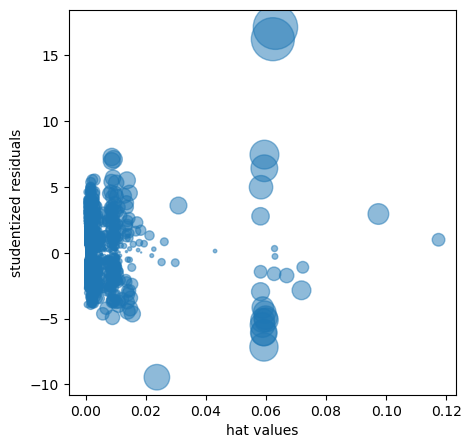

In [47]:
# data with high-leverage 
model=sm.regression.linear_model.OLS(y_train,X_train)
results = model.fit()
influence = OLSInfluence(results)
fig, ax = plt.subplots(figsize=(5,5))
#ax.axhline(-2.5, linestyle ='--')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal, s=1000 * np.sqrt(influence.cooks_distance[0]), alpha = 0.5)
ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')

## Polynomial / spline regression


In [48]:
formula = 'price ~ bs(sqft_living, df= 15 , degree= 7) + bedrooms + floors + sqft_lot + waterfront + view + condition + grade + sqft_basement + yr_built + yr_renovated + zipgroup_B + zipgroup_C + zipgroup_D'
model_spline = smf.ols(formula=formula, data = df3)
result_spline = model_spline.fit()
result_spline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     4194.
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:17:22   Log-Likelihood:            -2.8746e+05
No. Observations:               21612   AIC:                         5.750e+05
Df Residuals:                   21583   BIC:                         5.752e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             7.073e+06   1.62e+05     43.728      0.000    6.76e+06    7.39e+06
bs(sqft_living, df=15, degree=7)[0]  -4.295e+05   2.66e+05     -1.613      0.107   -9.52e+05    9.26e+04
bs(sqft_living, df=15, degree=7)[1]  -2.458e+05   1.44e+05     -1.701      0.089   -5.29e+05    3.74e+04
bs(sqft_living, df=15, degree=7)[2]  -4.721e+05   2.06e+05     -2.288      0.022   -8.77e+05   -6.77e+04
bs(sqft_living, df=15, degree=7)[3]  -2.568e+05   1.34e+05     -1.911      0.056    -5.2e+05    6549.889
bs(sqft_living, df=15, degree=7)[4]  -3.989e+05   1.47e+05     -2.706      0.007   -6.88e+05    -1.1e+05
bs(sqft_living, df=15, degree=7)[5]  -2.361e+05   1.29e+05     -1.824      0.068    -4.9e+05    1.77e+04
bs(sqft_living, df=15, degree=7)[6]  -2.954e+05   1.32e+05     -2.232      0.026   -5.55e+05   -3.59e+04
bs(sqft_living, df=15, degree=7)[7]  -2.281e+05   1.31e+05     -1.748      0.081   -4.84e+05    2.77e+04
bs(sqft_living, df=15, degree=7)[8]  -8.077e+04    1.4e+05     -0.575      0.565   -3.56e+05    1.94e+05
bs(sqft_living, df=15, degree=7)[9]   2.001e+05    2.2e+05      0.910      0.363   -2.31e+05    6.31e+05
bs(sqft_living, df=15, degree=7)[10] -4.643e+05   5.43e+05     -0.854      0.393   -1.53e+06    6.01e+05
bs(sqft_living, df=15, degree=7)[11] -4.293e+05   1.01e+06     -0.426      0.670   -2.41e+06    1.55e+06
bs(sqft_living, df=15, degree=7)[12]   1.97e+06    1.2e+06      1.636      0.102    -3.9e+05    4.33e+06
bs(sqft_living, df=15, degree=7)[13]  8.006e+06   7.42e+05     10.797      0.000    6.55e+06    9.46e+06
bs(sqft_living, df=15, degree=7)[14] -4.885e+05   1.97e+05     -2.482      0.013   -8.74e+05   -1.03e+05
bedrooms                             -9155.2885   1392.328     -6.576      0.000   -1.19e+04   -6426.222
floors                                4.541e+04   2414.021     18.809      0.000    4.07e+04    5.01e+04
sqft_lot                                 0.0388      0.025      1.576      0.115      -0.009       0.087
waterfront                              1.6e+05   1.28e+04     12.468      0.000    1.35e+05    1.85e+05
view                                   1.57e+04   1529.063     10.267      0.000    1.27e+04    1.87e+04
condition                             1.569e+04   1677.586      9.353      0.000    1.24e+04     1.9e+04
grade                                 9.346e+04   1503.853     62.149      0.000    9.05e+04    9.64e+04
sqft_basement                           19.9822      2.967      6.734      0.000      14.166      25.798
yr_built                             -2177.3805     45.370    -47.992      0.000   -2266.308   -2088.453
yr_renovated                             4.2452      2.608      1.628      0.104      -0.867       9.357
zipgroup_B                           -

### Generalized Additive Models: GAM

In [49]:
X = df3[best_variables2].values
y =df3['price']
formula = 'price ~ s(sqft_living) + bedrooms + floors + sqft_lot + waterfront + view + condition + grade + sqft_basement + yr_built + yr_renovated + zipgroup_B + zipgroup_C + zipgroup_D'
model_gam = GAM(s(0, n_splines=15) + l(1) + l(2) + l(3) + l(4) + l(5) + l(6) + l(7) + l(8) + l(9) + l(10) + l(11) + l(12) + l(13 )+ l(14) + l(15) +l(16)+ l(17) + l(18))
model_gam.gridsearch(X,y)

100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


GAM(callbacks=[Deviance(), Diffs()], distribution=NormalDist(), 
   fit_intercept=True, link=IdentityLink(), max_iter=100, 
   terms=s(0) + l(1) + l(2) + l(3) + l(4) + l(5) + l(6) + l(7) + l(8) + l(9) + l(10) + l(11) + l(12) + l(13) + l(14) + l(15) + l(16) + l(17) + l(18) + intercept,
   tol=0.0001, verbose=False)

In [50]:
model_gam.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     25.2506
Link Function:                     IdentityLink Log Likelihood:                               -528630.9201
Number of Samples:                        21612 AIC:                                          1057314.3414
                                                AICc:                                         1057314.4076
                                                GCV:                                      16776264612.4609
                                                Scale:                                    16740987044.3834
                                                Pseudo R-Squared:                                   0.8759
Feature Function                  Lam

C:\Users\omeganet\AppData\Local\Temp\ipykernel_6248\1623852485.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  model_gam.summary()


In [51]:
model_lgam = LinearGAM(s(0, n_splines=15) + l(1) + l(2) + l(3) + l(4) + l(5) + l(6) + l(7) + l(8) + l(9) + l(10) + l(11) + l(12) + l(13 )+ l(14) + l(15) +l(16)+ l(17) + l(18))
model_lgam.gridsearch(X,y)
model_lgam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     25.2506
Link Function:                     IdentityLink Log Likelihood:                               -528630.9201
Number of Samples:                        21612 AIC:                                          1057314.3414
                                                AICc:                                         1057314.4076
                                                GCV:                                      16776264612.4609
                                                Scale:                                    16740987044.3834
                                                Pseudo R-Squared:                                   0.8759
Feature Function                  Lam

C:\Users\omeganet\AppData\Local\Temp\ipykernel_6248\1508847805.py:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  model_lgam.summary()
